In [15]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [16]:
#Loading data
df = pd.read_csv('sales_data_final.csv')


In [17]:
print(df.head())


   order_date  order_number  order_warehouse_id                store_id  \
0  14/02/2023   23045429724                 9.0   pY85faVkR6OCPZQ0CefuH   
1  19/02/2023   23050463841                21.0  6FTIDJ65jt1arkhJm2bbmL   
2  20/02/2023   23051024482                 4.0  7JQvKYYMMCSzfni42DKw5a   
3  06/02/2023   23037635371                 4.0  6tjBYLZoWt70PUXokHPEit   
4  15/02/2023   23046508076                15.0  1w0FMk0J5K43sIqSZv9b5t   

  order_status              item_id  amount_per_unit  ordered_quantity  \
0       CLOSED  P437048134760065132            281.0                 1   
1       CLOSED       P5801744203932             75.0                10   
2       CLOSED  P810622842427393343           5420.0                 1   
3    CANCELLED  P957287950450245066           2600.0                50   
4       CLOSED  P862686710671848219             85.0                15   

   item_discount expected_delivery_date  
0            0.0             15/02/2023  
1            0.0    

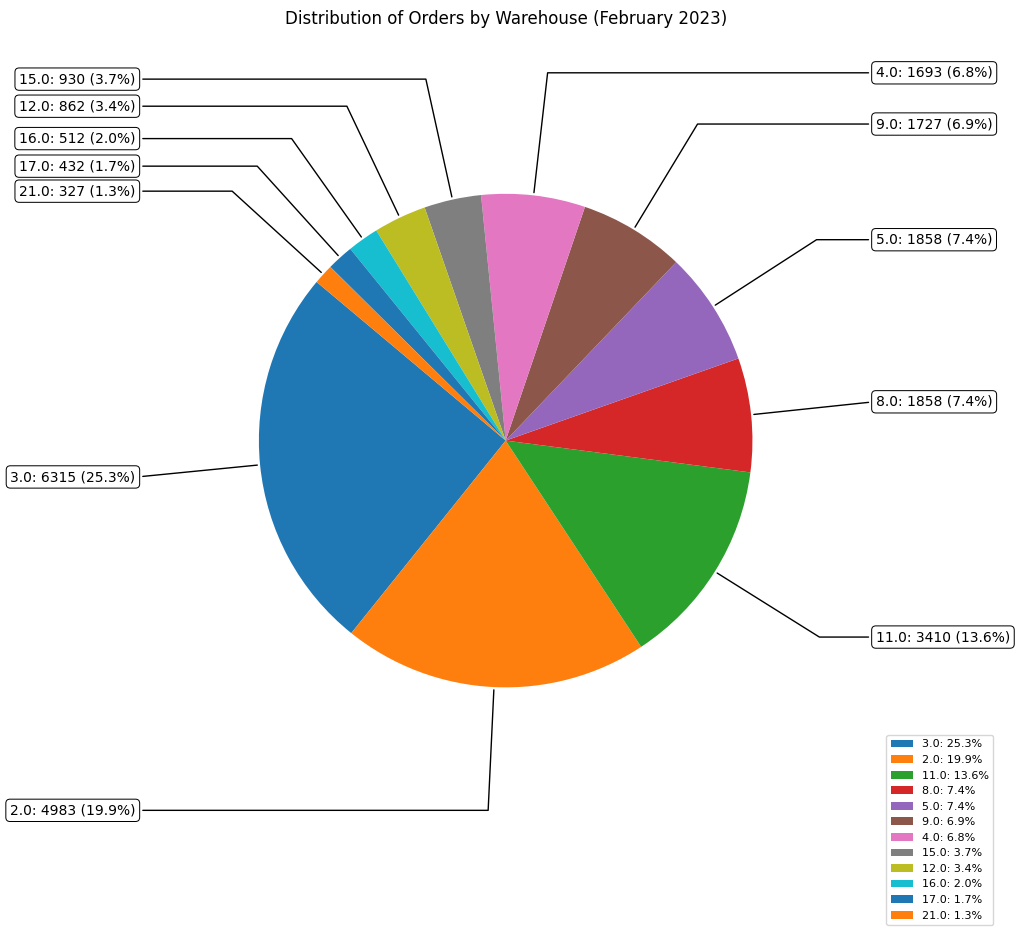

In [18]:

#Pie chart illustrating the distribution of orders by warehouse

# Count orders by warehouse and sort by descending order 
orders_by_warehouse = df['order_warehouse_id'].value_counts().sort_values(ascending=False)

# Calculate percentages
total_orders = orders_by_warehouse.sum()
orders_by_warehouse_pct = orders_by_warehouse / total_orders * 100

# Filter to include only slices greater than 1%
orders_by_warehouse_filtered = orders_by_warehouse[orders_by_warehouse_pct > 1]

# Create pie chart without percentages 
plt.figure(figsize=(12, 12))  # Adjust figure size as needed

wedges, _ = plt.pie(
    orders_by_warehouse_filtered,
    labels=None,  # Remove original labels
    startangle=140,
    pctdistance=1.2,  # Adjust label placement inside slices
)

# Customize plot title
plt.title("Distribution of Orders by Warehouse (February 2023)")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Customize annotations
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", color='black', lw=1), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    # Annotate with order count and percentage
    label = f"{orders_by_warehouse_filtered.index[i]}: {orders_by_warehouse_filtered.values[i]} ({orders_by_warehouse_filtered.values[i] / total_orders * 100:.1f}%)"
    plt.annotate(label, xy=(x, y), xytext=(1.5 * np.sign(x), 1.5 * y),
                 horizontalalignment=horizontalalignment, **kw)

# Create legend outside with warehouse IDs and percentages
legend_labels = [f"{w}: {p:.1f}%" for w, p in zip(orders_by_warehouse_filtered.index, orders_by_warehouse_filtered.values / total_orders * 100)]  # Combine labels with percentages
plt.legend(legend_labels, loc='lower center', bbox_to_anchor=(1.3, -0.1), fontsize=8, ncol=1)

# Display plot
plt.tight_layout()
plt.show()







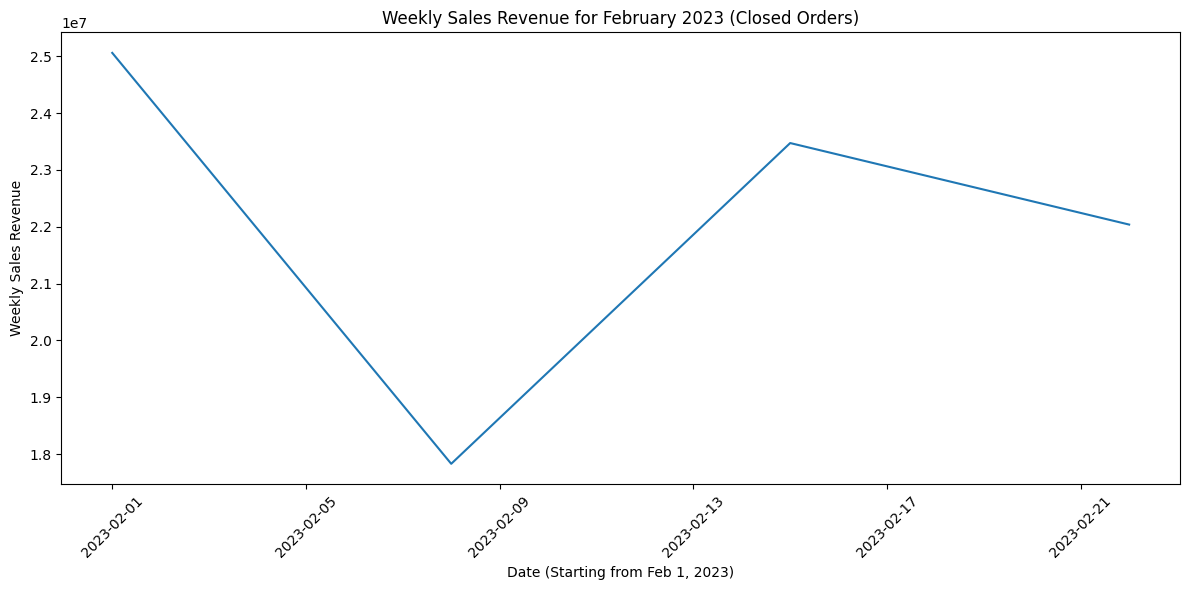

In [19]:
#Time series plot of sales revenue over time

# Convert order_date to datetime format (assuming DD/MM/YYYY)
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y')

# Calculate sales revenue for each order 
df['sales_revenue'] = df['amount_per_unit'] * df['ordered_quantity'] - df['item_discount']

# Filter for closed orders only
df_filtered = df[df["order_status"] == "CLOSED"]

# Set the order_date as the index for resampling
df_filtered.set_index('order_date', inplace=True)

# Weekly revenue using rolling window (7 days)
weekly_revenue = df_filtered['sales_revenue'].resample('7D').sum()

# Time series plot with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_revenue.index, y=weekly_revenue.values) 

# Customize plot
plt.xlabel("Date (Starting from Feb 1, 2023)")
plt.ylabel("Weekly Sales Revenue")
plt.title("Weekly Sales Revenue for February 2023 (Closed Orders)")
plt.xticks(rotation=45) 
plt.tight_layout()

# Display plot
plt.show()